<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Deep_Learning_GD_vs_SGD(Stochastic_Gradient_Descent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print(len(train_data[0])) # 전처리 전 데이터
    print(train_data[0])

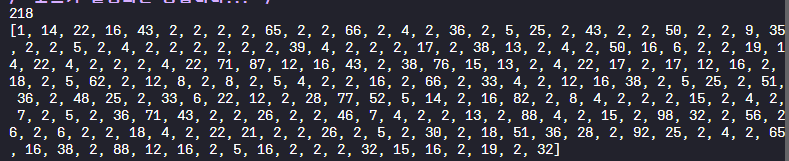

In [ ]:
print(len(train_data[0])) # 전처리 후 데이터
    print(train_data[0])
    print(train_labels[0])

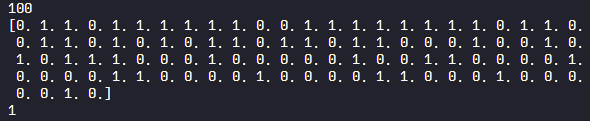

전체 실습코드

In [ ]:
import numpy as np
import tensorflow as tf
from visual import *

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

tf.random.set_seed(0)

# 데이터를 전처리하는 함수

def sequences_shaping(sequences, dimension): # 입력 : 전처리할 문장들, 전처리된 데이터의 크기

    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 # 단어가 들어있으면 그 위치를 1로 바꿔줌

    return results

'''
1. GD를 적용할 모델을 자유롭게 생성합니다.
'''

def GD_model(word_num):

    model = tf.keras.Sequential([tf.keras.layers.Dense(32, input_shape=(word_num,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')])
    # 입력층 처음에는 input_shape를 지정해야함.
    # 출력층 노드는 1이다. binary classificaion 하기 때문에

    return model

'''
2. SGD를 적용할 모델을 GD를 적용할 모델과 똑같이 생성합니다.
'''

def SGD_model(word_num):

    model = tf.keras.Sequential([tf.keras.layers.Dense(32, input_shape=(word_num,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')])

    return model

'''
3. 두 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. GD 함수와 SGD 함수를 이용해
           두 모델을 불러옵니다.

   Step02. 두 모델의 손실 함수, 최적화 알고리즘,
           평가 방법을 설정합니다.

   Step03. 두 모델의 구조를 확인하는 코드를 작성합니다.

   Step04. 두 모델을 각각 학습시킵니다.
           검증용 데이터도 설정해주세요.
           'epochs'는 20으로 설정합니다.

           GD를 적용할 경우 학습 시
           전체 데이터 셋(full-batch)을
           사용하므로 'batch_size'를
           전체 데이터 개수로 설정합니다.

           SGD를 적용할 경우 학습 시
           미니 배치(mini-batch)를 사용하므로
           'batch_size'를 전체 데이터 개수보다
           작은 수로 설정합니다.

           여기선 500으로 설정하겠습니다.

   Step05. 학습된 두 모델을 테스트하고
           binary crossentropy 값을 출력합니다.
           둘 중 어느 모델의 성능이 더 좋은지 확인해보세요.
'''

def main():

    word_num = 100
    data_num = 25000

    # Keras에 내장되어 있는 imdb 데이터 세트를 불러오고 전처리합니다.

    (train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words = word_num)
    # print(len(train_data[0])) # 전처리 전 데이터
    # print(train_data[0])
    train_data = sequences_shaping(train_data, dimension = word_num)
    test_data = sequences_shaping(test_data, dimension = word_num)
    # print(len(train_data[0])) # 전처리 후 데이터
    # print(train_data[0])
    # print(train_labels[0])

    gd_model = GD_model(word_num)   # GD를 사용할 모델입니다.
    sgd_model = SGD_model(word_num)  # SGD를 사용할 모델입니다.

    gd_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy', 'binary_crossentropy'])
    sgd_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy', 'binary_crossentropy'])

    gd_model.summary()
    sgd_model.summary()

    gd_history = gd_model.fit(train_data, train_labels, epochs=20, batch_size=data_num, validation_data=(test_data, test_labels), verbose=0)
    print('\n')
    sgd_history = sgd_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels), verbose=0)

    scores_gd = gd_history.history['val_binary_crossentropy'][-1]
    scores_sgd = sgd_history.history['val_binary_crossentropy'][-1]

    print('\nscores_gd: ', scores_gd)
    print('scores_sgd: ', scores_sgd)

    Visulaize([('GD', gd_history),('SGD', sgd_history)])

    return gd_history, sgd_history

if __name__ == "__main__":
    main()

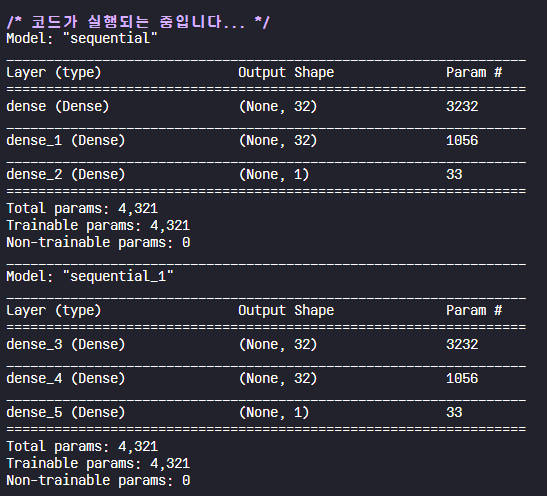

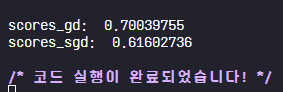

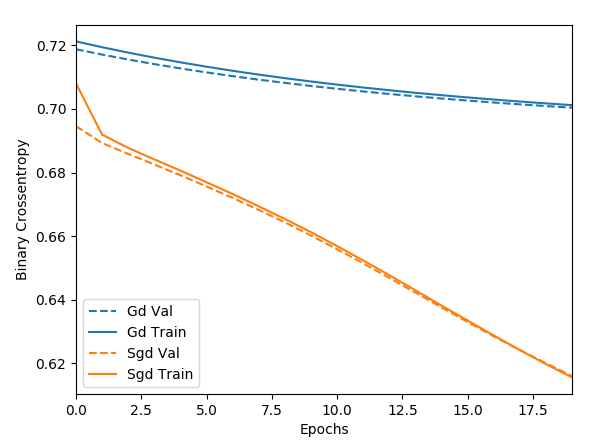